In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:,-1]

In [5]:
from sklearn.cluster import KMeans

In [6]:
iris_cluster_model = KMeans(n_clusters=3, random_state=1, n_init=10)

In [7]:
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [8]:
import numpy as np

In [9]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
pred = np.choose(iris_cluster_model.labels_, [1,0,2])

In [11]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
le.fit(iris.species)

LabelEncoder()

In [14]:
predict = le.inverse_transform(pred)

In [15]:
predict

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

# 클러스터의 개수 및 소속을 알고 있는 경우

## Rand index

In [16]:
def rand_index(y_true, y_pred):
    n = len(y_true)
    a, b = 0, 0
    for i in range(n):
        for j in range(i+1, n):
            if (y_true[i] == y_true[j]) & (y_pred[i] == y_pred[j]):
                a += 1
            elif (y_true[i] != y_true[j]) & (y_pred[i] != y_pred[j]):
                b += 1
            else:
                pass
    RI = (a + b) / (n*(n-1)/2)
    return RI

In [17]:
rand_index(iris.species, predict)

0.8797315436241611

In [18]:
iris_cluster_model = KMeans(n_clusters=2, random_state=1, n_init=10)

In [19]:
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=2, n_init=10, random_state=1)

In [20]:
iris_cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
y_true = [0]*50 + [1]*100

In [22]:
rand_index(y_true, iris_cluster_model.labels_)

0.9605369127516779

In [23]:
from sklearn.metrics import adjusted_rand_score

In [24]:
adjusted_rand_score(y_true, iris_cluster_model.labels_)

0.920405050901892

In [25]:
predict

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

In [26]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## Adjusted Mutual Information

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
mutual_info_score(iris.species, predict)

0.8255910976103356

In [29]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(iris.species, predict)

0.7581756800057784

In [30]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(iris.species, predict)

0.7551191675800483

## Fowlkes-Mallows index

In [31]:
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(labels_true=iris.species, 
                       labels_pred=predict)

0.8208080729114153

# homogeneity, completeness, v-measure

In [32]:
from sklearn.metrics import homogeneity_score
homogeneity_score(iris.species, predict)

0.7514854021988338

In [33]:
from sklearn.metrics import completeness_score
completeness_score(iris.species, predict)

0.7649861514489815

In [34]:
from sklearn.metrics import v_measure_score
v_measure_score(iris.species, predict)

0.7581756800057784

# 클러스터의 개수 및 소속을 모르고 있는 경우리도

## 응집도와 분리도

## 실루엣 계수

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [36]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.loc[:, ["petal_length", "petal_width"]]

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.7653904101258123


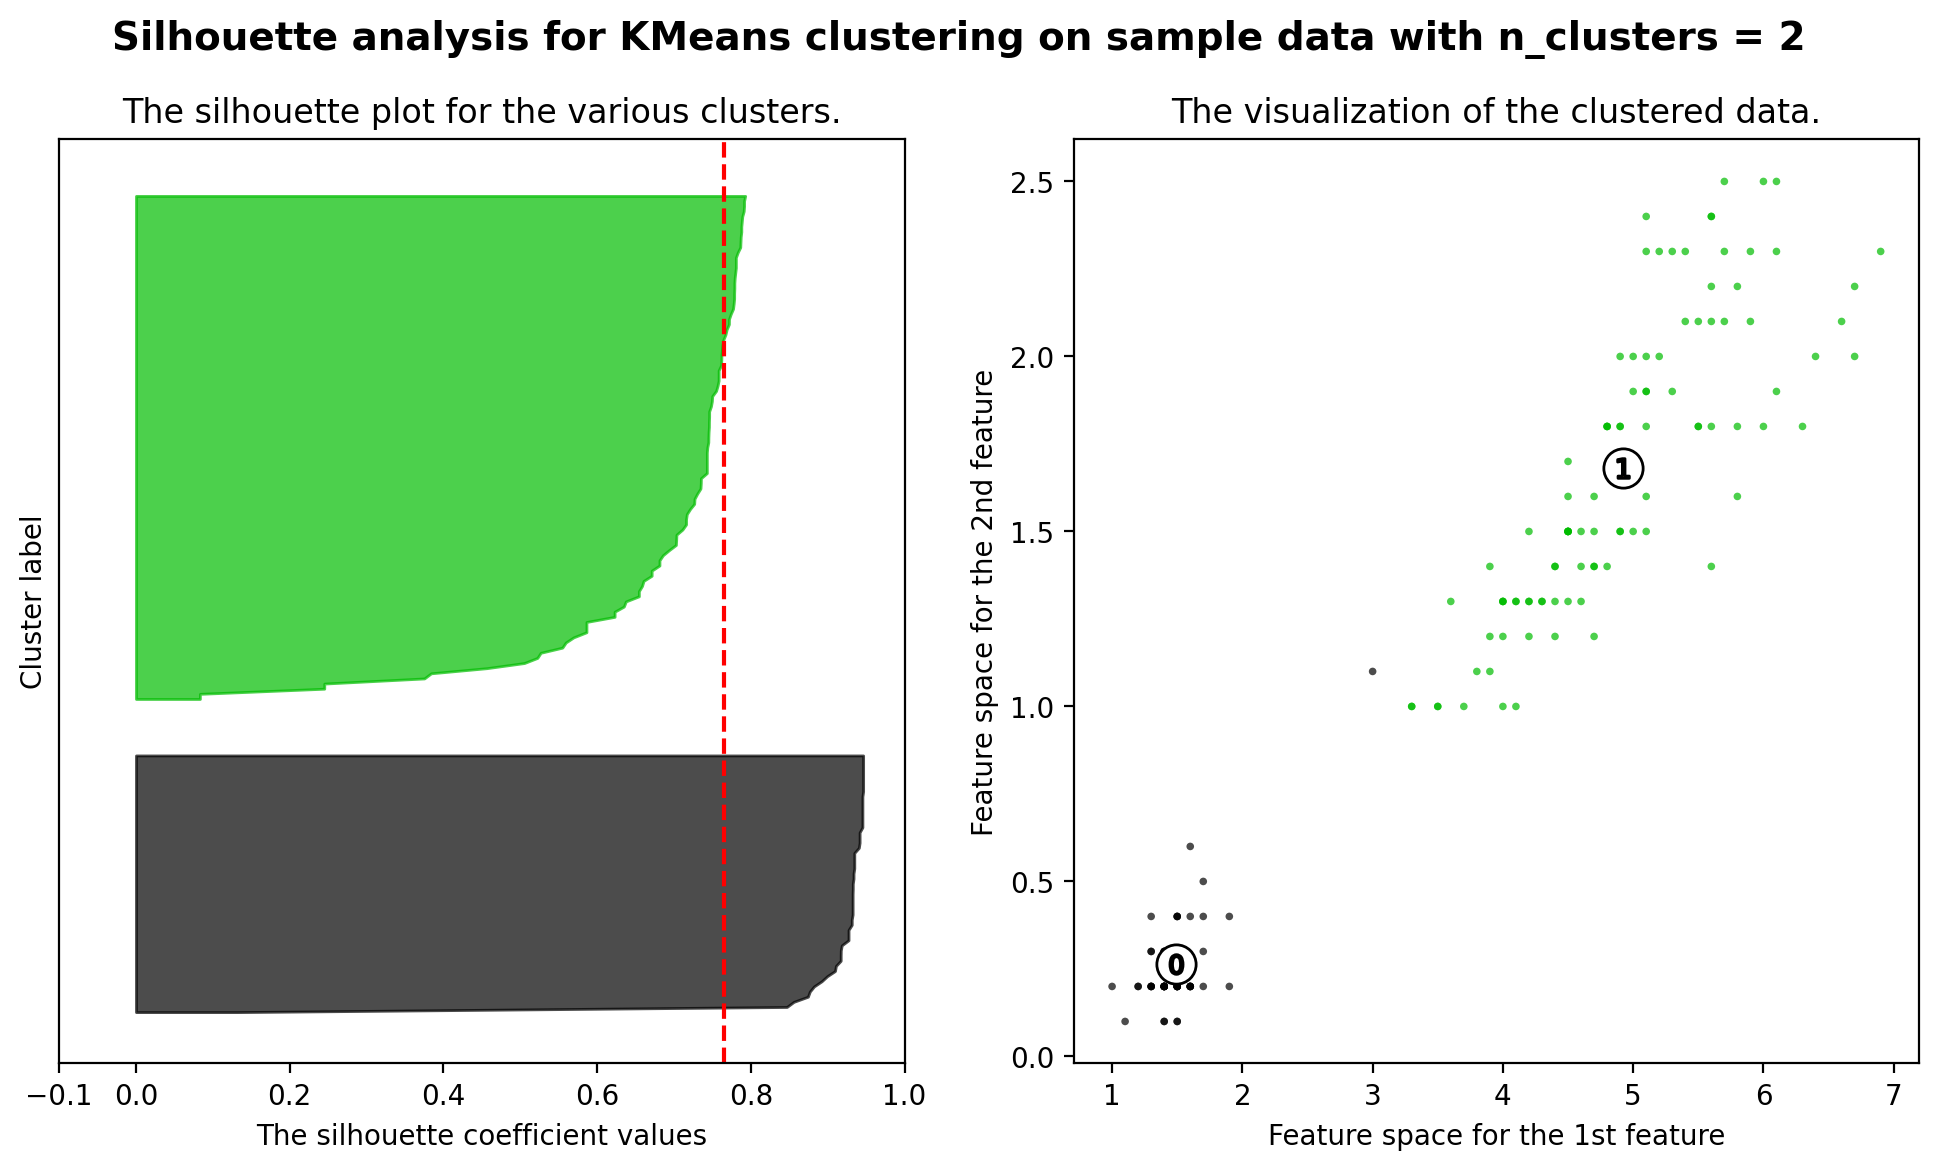

For n_clusters = 3 The average silhouette_score is : 0.6604800083974887


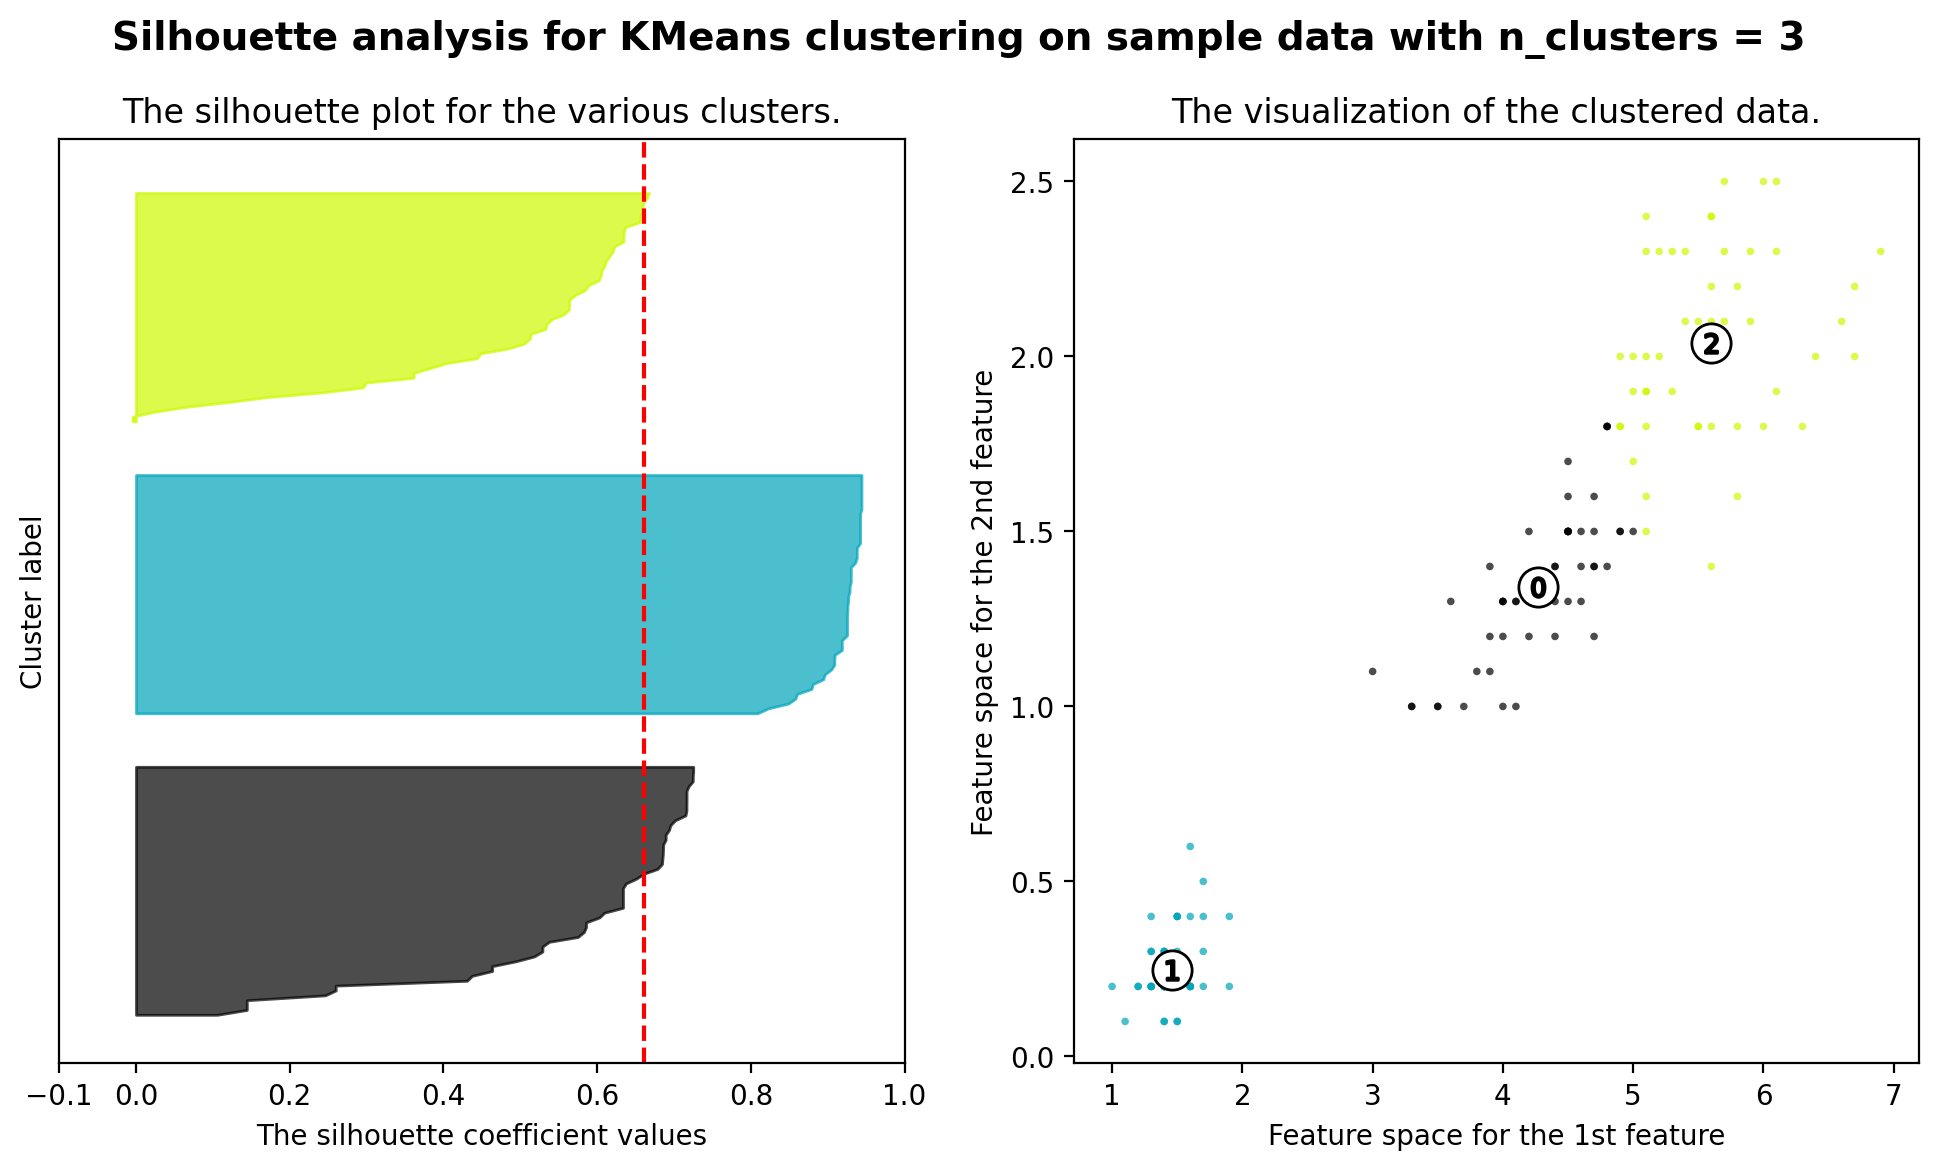

For n_clusters = 4 The average silhouette_score is : 0.6127580794464402


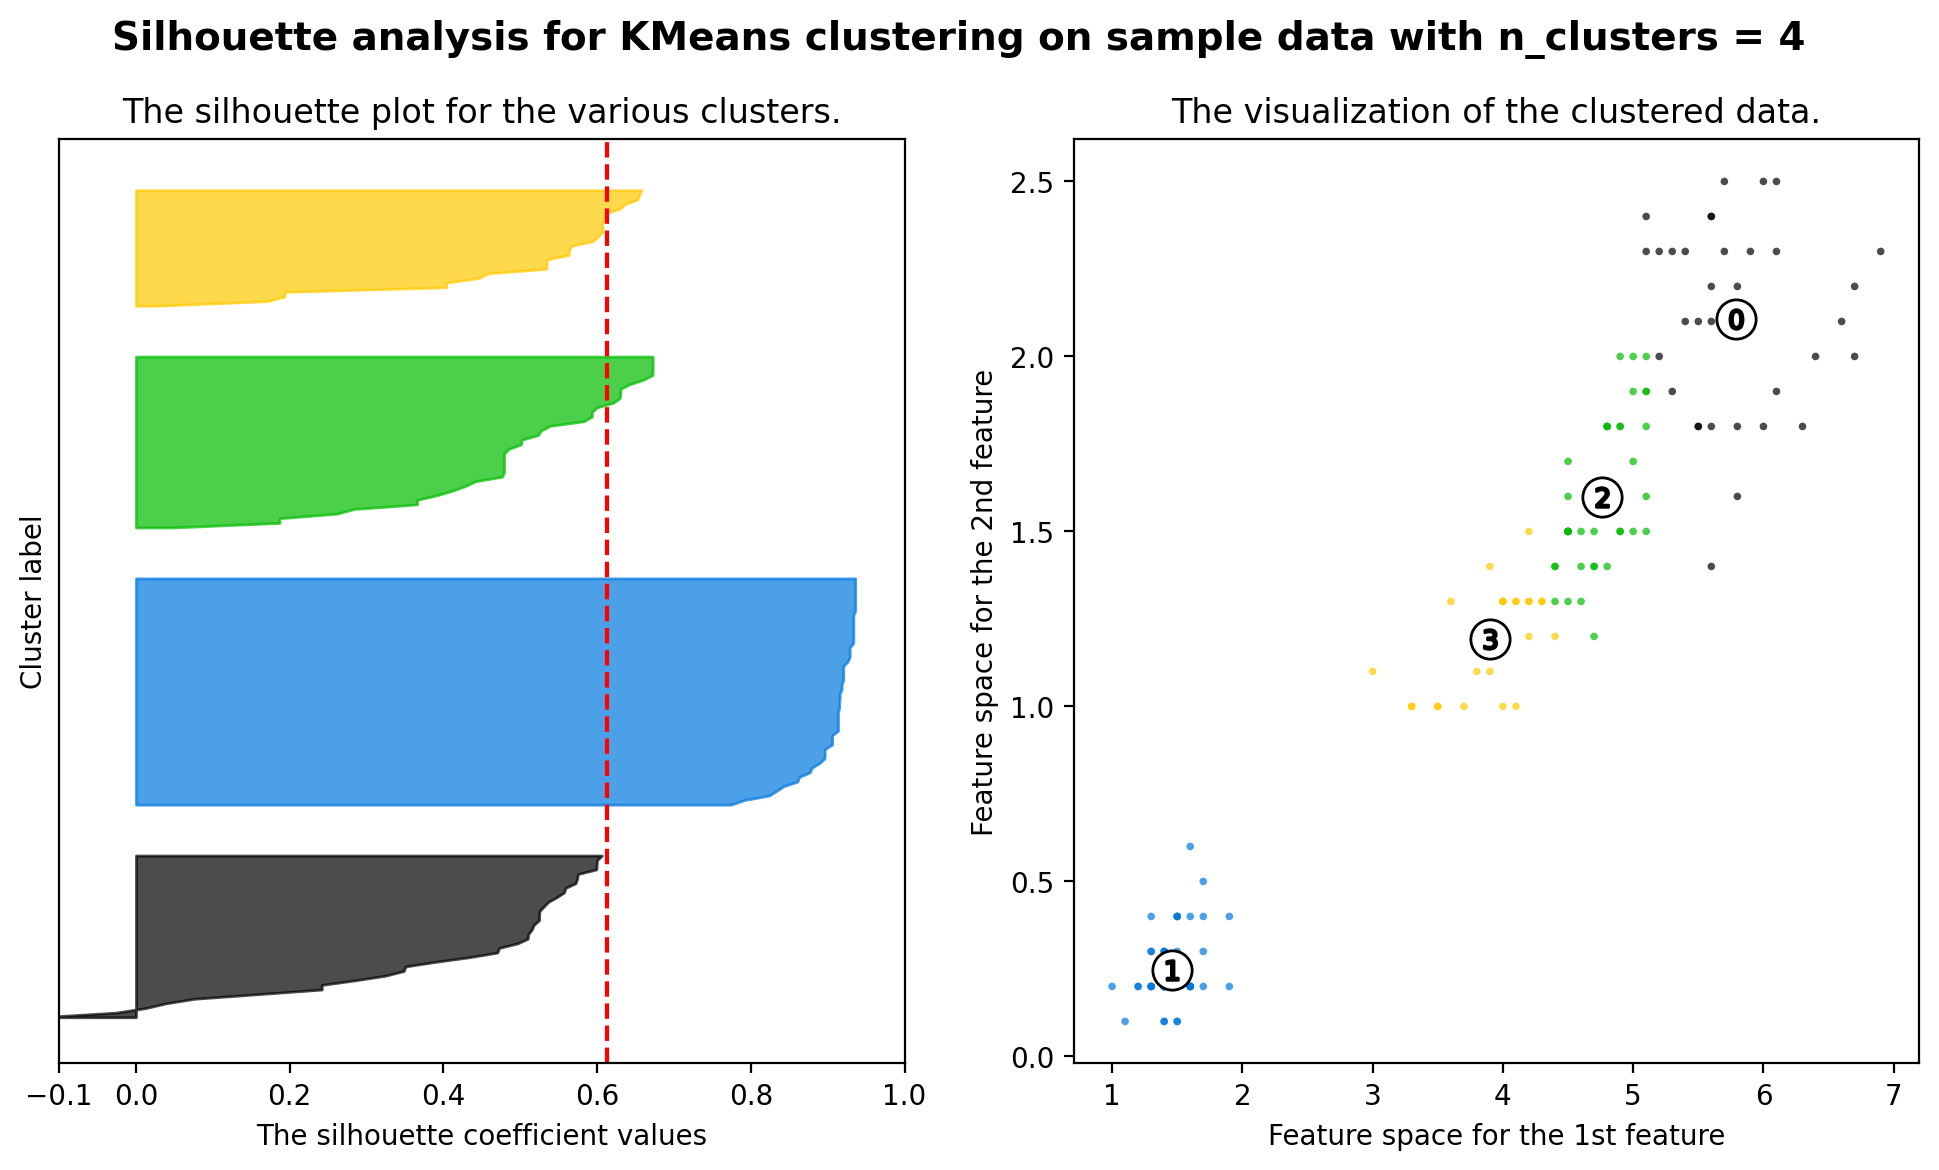

For n_clusters = 5 The average silhouette_score is : 0.5883732712110276


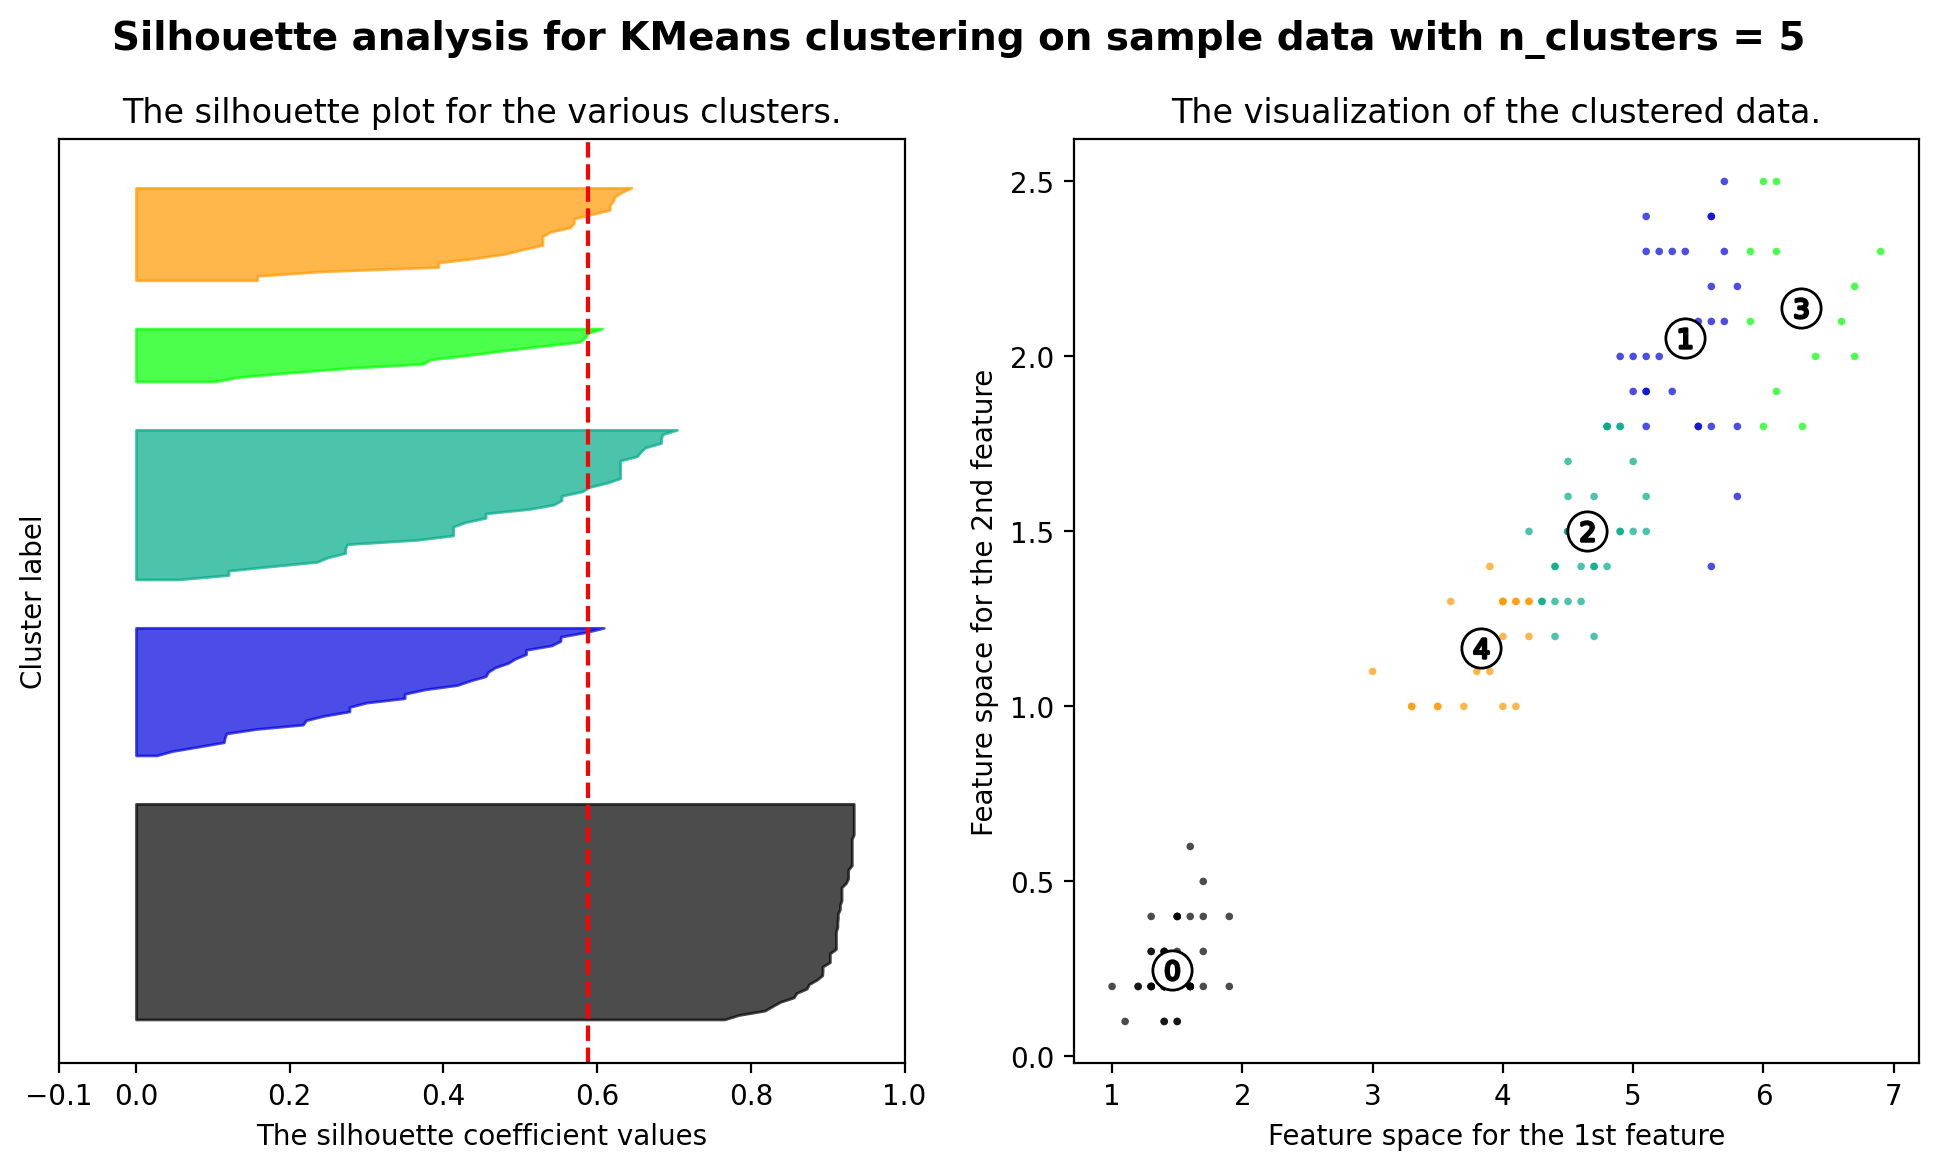

For n_clusters = 6 The average silhouette_score is : 0.5769601940397073


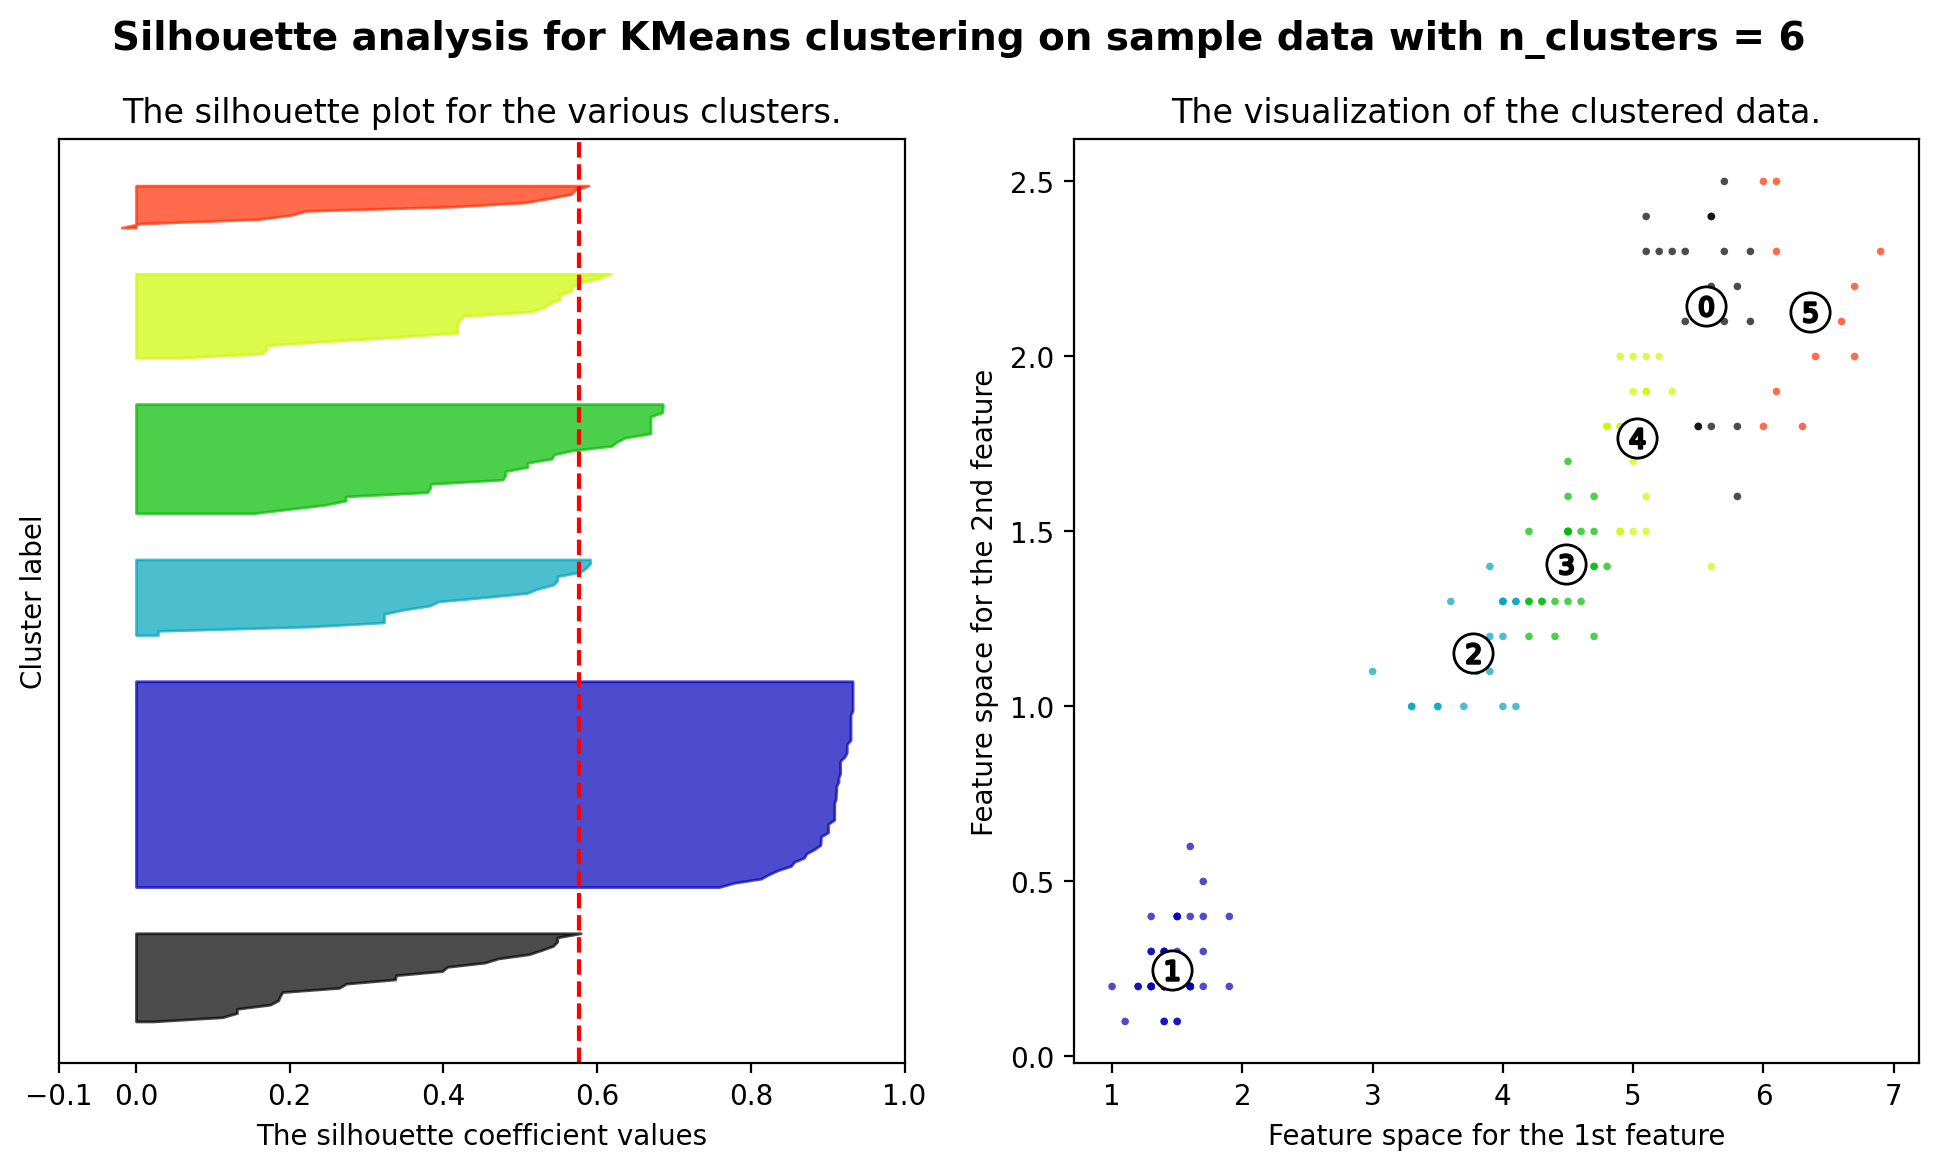

In [38]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(iris_X) + (n_clusters + 1) * 10])

    # 클러스터의 수만큼 KMeans 모형을 만들고 클러스터를 예측함
    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = model.fit_predict(iris_X)

    # 모든 샘플에 대한 실루엣 스코어 평균값을 계산함
    silhouette_avg = silhouette_score(iris_X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대해서 실루엣 스코어를 계산함
    sample_silhouette_values = silhouette_samples(iris_X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 변수의 평균 실루엣 점수를 이용해 수직선을 추가함
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터 된 산점도 그래프를 그려줌
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], 
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터 라벨링
    centers = model.cluster_centers_
    # 클러스터 중앙에 태두리가 검정색인 하얀 원을 그림
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

## WSS와 엘보우

In [39]:
!pip install kneed

In [40]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.loc[:, ["petal_length", "petal_width"]]
x1 = iris.petal_length
x2 = iris.petal_width

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeans_model.fit(X)
    euc_dist = cdist(X, kmeans_model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(euc_dist, axis=1)) / X.shape[0]
    distortions.append(distortion)

In [42]:
from kneed import KneeLocator
kn = KneeLocator(list(K), distortions, 
                 curve='convex', direction='decreasing')

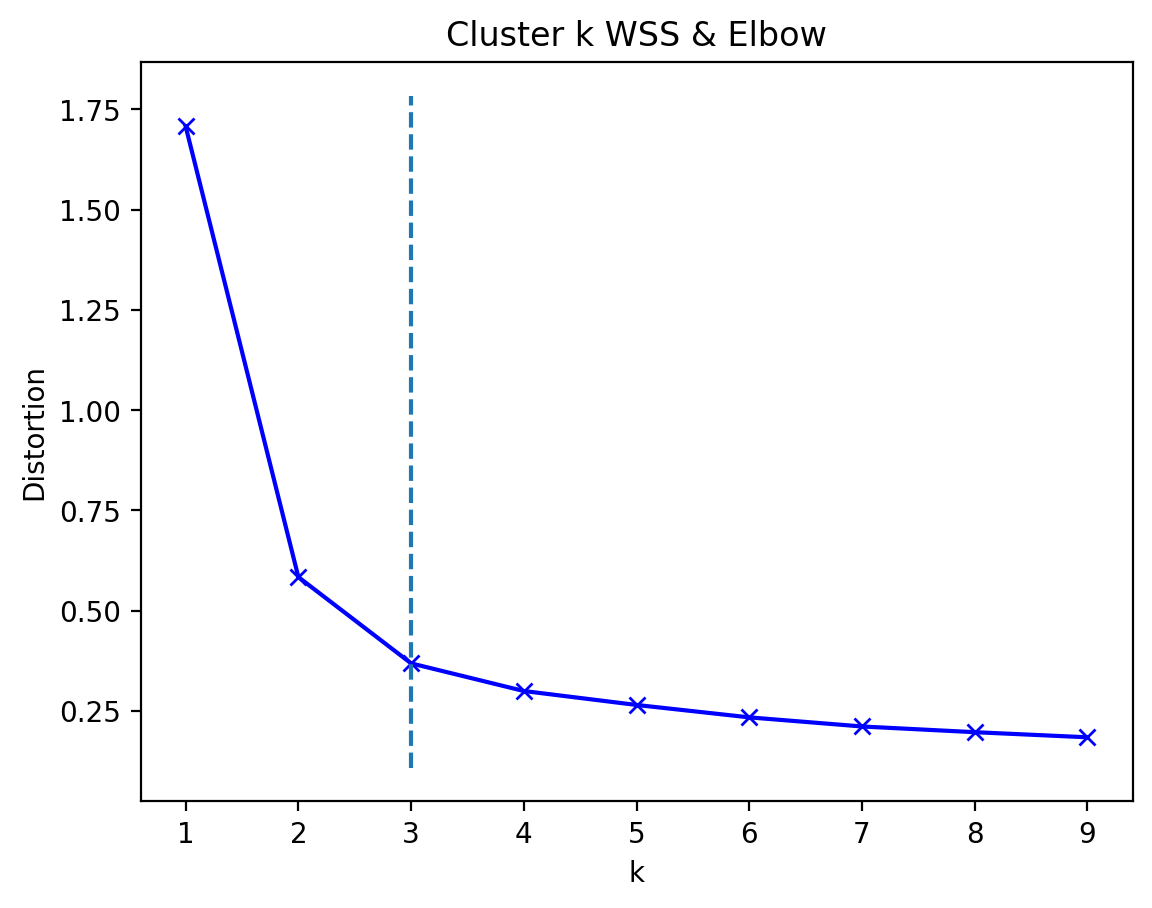

In [43]:
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster k WSS & Elbow')
plt.show()

## Calinski Harabasz Score(Variance Ratio Criterion)

In [44]:
import seaborn as sns
iris = sns.load_dataset("iris")
 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

In [45]:
ch_score = []
data = iris.iloc[:, :-1]
for i in range(2,6):
    clustering = AgglomerativeClustering(n_clusters=i).fit(data)
    ch_score.append(calinski_harabasz_score(data, clustering.labels_))
ch_score # 군 2개부터 점수를 측정했으므로 두 번째, 즉 군 3개인 경우가 가장 좋은 군임

[502.82156350235897, 558.0580408128307, 515.0789062430442, 488.48490403651624]